<a href="https://colab.research.google.com/github/theindianczar/ml/blob/master/simplilearn_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

import statsmodels.formula.api as smf
from sklearn import model_selection
from math import sqrt
%matplotlib inline

In [ ]:
data = pd.read_csv("C:\\Users\\ysachde\\simplilearn\\Demo_Datasets\\Demo Datasets\\Lesson 4\\Advertising.csv",index_col=0)

In [ ]:
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


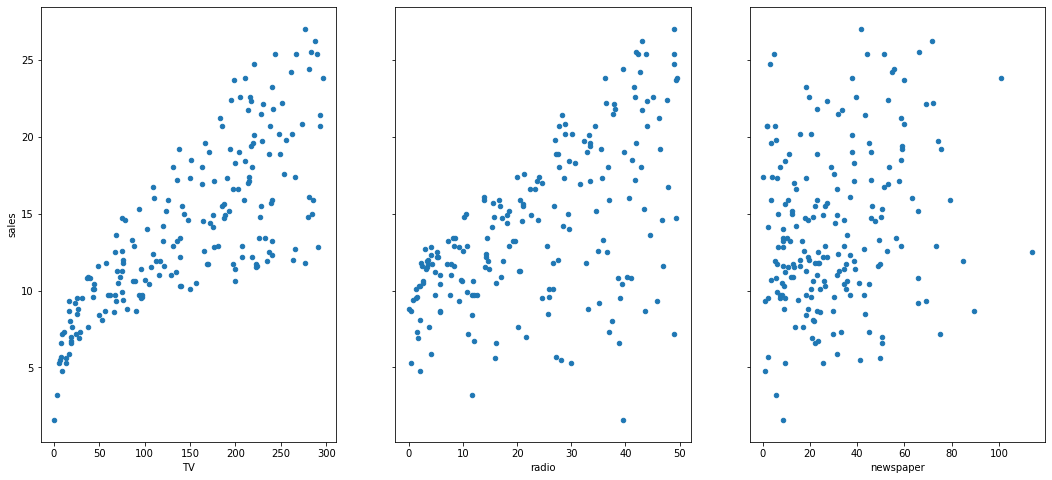

In [ ]:
fig,axes = plt.subplots(1,3,sharey=True)
data.plot(kind='scatter',x='TV',y='sales',ax=axes[0],figsize=[18,8])
data.plot(kind='scatter',x='radio',y='sales',ax = axes[1])
data.plot(kind='scatter',x='newspaper',y='sales',ax=axes[2])

In [ ]:
feature_cols=['TV']
x=data[feature_cols]
y=data['sales']

In [ ]:
lm= LinearRegression()
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(lm.intercept_)
print(lm.coef_)

7.032593549127693
[0.04753664]


In [ ]:
x_new=pd.DataFrame({'TV':[50]})
x_new

,TV
0,50


In [ ]:
lm.predict(x_new)

array([9.40942557])

In [ ]:
x_new = pd.DataFrame({'TV':[data.TV.min(),data.TV.max()]})

In [ ]:
x_new

,TV
0,0.7
1,296.4


In [ ]:
preds = lm.predict(x_new)
preds

array([ 7.0658692 , 21.12245377])

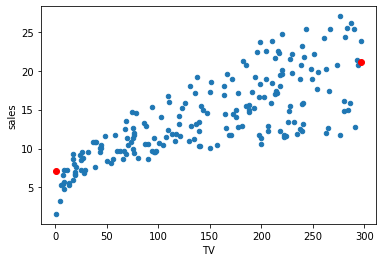

In [ ]:
data.plot(kind='scatter',x='TV',y='sales')
plt.plot(x_new,preds,'ro',linewidth=2)

In [ ]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='sales~TV',data=data).fit()
lm.conf_int()
lm.pvalues
lm.rsquared

In [ ]:
lm.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [ ]:
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [ ]:
lm.rsquared

0.611875050850071

In [ ]:
feat_cols=['TV','radio','newspaper']
x=data[feat_cols]
y=data.sales
xtrain,xtest,ytrain,ytest =model_selection.train_test_split(x,y,test_size=.3,random_state=42)

In [ ]:
lm = LinearRegression()
lm.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(lm.intercept_)
print(lm.coef_)

2.70894909251591
[0.04405928 0.1992875  0.00688245]


In [ ]:
predicts = lm.predict(xtest)
predicts

array([16.5653963 , 21.18822792, 21.55107058, 10.88923816, 22.20231988,
       13.35556872, 21.19692502,  7.35028523, 13.27547079, 15.12449511,
        9.01443026,  6.52542825, 14.30205991,  8.97026042,  9.45679576,
       12.00454351,  8.91549403, 16.15619251, 10.29582883, 18.72473553,
       19.76821818, 13.77469028, 12.49638908, 21.53501762,  7.60860741,
        5.6119801 , 20.91759483, 11.80627665,  9.08076637,  8.51412012,
       12.17604891,  9.9691939 , 21.73008956, 12.77770578, 18.1011362 ,
       20.07590796, 14.26202556, 20.93826535, 10.83938827,  4.38190607,
        9.51332406, 12.40486324, 10.17045434,  8.09081363, 13.16388427,
        5.2243552 ,  9.28893833, 14.09330719,  8.69024497, 11.66119763,
       15.71848432, 11.63156862, 13.35360735, 11.1531472 ,  6.33636845,
        9.76157954,  9.4195714 , 24.25516546,  7.69519137, 12.15317572])

In [ ]:
print(sqrt(mean_squared_error(ytest,predicts)))

1.9485372043446387


In [ ]:
lm = smf.ols(formula='sales~TV+radio+newspaper',data=data).fit()
lm.conf_int()
lm.pvalues
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 24 Jun 2020   Prob (F-statistic):           1.58e-96
Time:                        17:50:14   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
np.random.seed(12345)

nums = np.random.rand(len(data))
filter_large = nums>0.5

filter_large


numpy.ndarray

In [ ]:
data['Size']='small'
data.loc[filter_large,'Size']='large'
data.head()

,TV,radio,newspaper,sales,Size
1,230.1,37.8,69.2,22.1,large
2,44.5,39.3,45.1,10.4,small
3,17.2,45.9,69.3,9.3,small
4,151.5,41.3,58.5,18.5,small
5,180.8,10.8,58.4,12.9,large


In [ ]:
data['isLarge'] =data.Size.map({'large':1,'small':0})
data

,TV,radio,newspaper,sales,Size,isLarge
1,230.1,37.8,69.2,22.1,large,1
2,44.5,39.3,45.1,10.4,small,0
3,17.2,45.9,69.3,9.3,small,0
4,151.5,41.3,58.5,18.5,small,0
5,180.8,10.8,58.4,12.9,large,1
...,...,...,...,...,...,...
196,38.2,3.7,13.8,7.6,small,0
197,94.2,4.9,8.1,9.7,small,0
198,177.0,9.3,6.4,12.8,small,0
199,283.6,42.0,66.2,25.5,small,0


In [ ]:
feature_cols=['TV','newspaper','radio','isLarge']
x=data[feature_cols]
y= data.sales
lm = LinearRegression()
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lm.coef_

NameError: name 'lm' is not defined

In [ ]:
zip(feature_cols,lm.coef_)